In [1]:
import torch
import pandas as pd
from tqdm.notebook import trange, tqdm

torch.cuda.is_available()

True

#  Read_CSV 

In [39]:
df1 = pd.read_csv('BTC_tweets_daily_example.csv')
df1.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'Screen_name', 'Source', 'Link',
       'Sentiment', 'sent_score', 'New_Sentiment_Score',
       'New_Sentiment_State'],
      dtype='object')

# Preprocessing

##  Utils fuunctions

In [40]:
def count_digit(num):
    count = 0
    while num != 0:
        num //= 10
        count += 1
    return count

def check_shape(df):
    rows, cols = df.shape
    print("\nNumber or rows in dataset: {}".format(rows))
    print("==========================={}".format(count_digit(rows)*'='))
    print("\nNumber or columns in dataset: {}".format(cols))
    print("=============================={}".format(count_digit(cols)*'='))

##  rename columns

In [41]:
# renamme colummn
df1.rename(columns = {'Unnamed: 0':'id'}, inplace = True)
df = df1[['id', 'Tweet', 'Sentiment']]
# check the numbber of rows and   coolumnss in datasset
check_shape(df)
df.head()


Number or rows in dataset: 50873

Number or columns in dataset: 3


,id,Tweet,Sentiment
0,0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",['neutral']
1,1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,['neutral']
2,2,RT @tippereconomy: Another use case for #block...,['positive']
3,3,free coins https://t.co/DiuoePJdap,['positive']
4,4,RT @payvxofficial: WE are happy to announce th...,['positive']


## rename calss names

In [5]:
class_dict = {"['neutral']": 'neutral', "['positive']": 'positive', "['negative']": 'negative'}
df['Sentiment'] = df.Sentiment.replace(class_dict)
df.head()

,id,Tweet,Sentiment
0,0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",neutral
1,1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,neutral
2,2,RT @tippereconomy: Another use case for #block...,positive
3,3,free coins https://t.co/DiuoePJdap,positive
4,4,RT @payvxofficial: WE are happy to announce th...,positive


## remove nan and empty rows

In [6]:
df = df[df['Sentiment'] != '0.0']
check_shape(df)
df = df[df.Sentiment.notnull()]
check_shape(df)


Number or rows in dataset: 50866

Number or columns in dataset: 3

Number or rows in dataset: 50852

Number or columns in dataset: 3


## Extract  number of classes aand their count

In [7]:
classes = list(df.Sentiment.unique())
possible_labels = df.Sentiment.unique()
print("\nNummber of classes in dataset: {}".format(len(classes)))
print("==============================={}".format(count_digit(len(classes))*'='))
print("\nName of the classes")
print("===================\n")
print(classes,"\n")


Nummber of classes in dataset: 3

Name of the classes

['neutral', 'positive', 'negative'] 



In [8]:
classes_counts = df.Sentiment.value_counts()
print("\nclasses counts")
print("==============\n")
print(classes_counts)


classes counts

positive    22937
neutral     21932
negative     5983
Name: Sentiment, dtype: int64


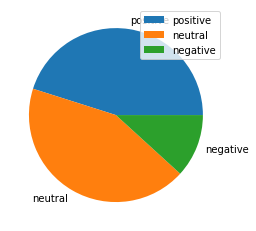

In [9]:
# display classes count
import matplotlib.pyplot as plt
import numpy as np

values = np.array(classes_counts)
mylabels = list(classes_counts.index)

plt.pie(values, labels = mylabels)
plt.legend()
plt.show() 

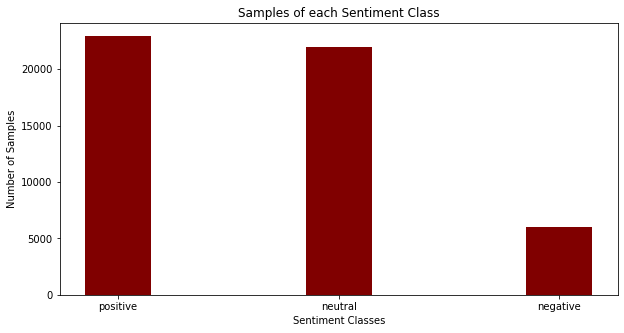

In [12]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(mylabels, values, color ='maroon', width=0.3)
 
plt.xlabel("Sentiment Classes")
plt.ylabel("Number of Samples")
plt.title("Samples of each Sentiment Class")
plt.show()

## Label Encoding

In [13]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label]= index
label_dict

{'neutral': 0, 'positive': 1, 'negative': 2}

In [14]:
df['label'] = df.Sentiment.replace(label_dict)
df.head()

,id,Tweet,Sentiment,label
0,0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",neutral,0
1,1,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,neutral,0
2,2,RT @tippereconomy: Another use case for #block...,positive,1
3,3,free coins https://t.co/DiuoePJdap,positive,1
4,4,RT @payvxofficial: WE are happy to announce th...,positive,1


# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(
    df,
    test_size=0.15,
    random_state=17,
    stratify=df.label.values
)

print("\nTraining Set:")
check_shape(train)
print("\nTesting Set:")
check_shape(val)


Training Set:

Number or rows in dataset: 43224

Number or columns in dataset: 4

Testing Set:

Number or rows in dataset: 7628

Number or columns in dataset: 4


In [16]:
print("\nTraining Data:")
print("=============")
train.head()


Training Data:


,id,Tweet,Sentiment,label
40003,39999,Name: WaBi\nSymbol: WABI\n24 hour change: -4.1...,negative,2
22660,22656,RT @FreeZone_one: Freezone will change your li...,neutral,0
170,170,RT @nfrisbie83: OK Internet... I need your hel...,positive,1
44649,44645,RT @nfrisbie83: OK Internet... I need your hel...,positive,1
36573,36569,get it @bethereumteam #bethereum #BountyCampai...,neutral,0


In [17]:
print("\nTesting Data:")
print("=============")
val.head()


Testing Data:


,id,Tweet,Sentiment,label
42486,42482,TSX Group Subsidiary to Launch Cryptocurrency ...,neutral,0
26517,26513,@Pinboard I think of Jack as a trend-chaser - ...,positive,1
6544,6544,RT @bit_rent: I just published “While Bitcoin ...,positive,1
39924,39920,Monthly Web Traffic for Major Bitcoin Exchange...,negative,2
42309,42305,"""Bitcoin Price Technical Analysis for 03/23/20...",neutral,0


# Download and Initialize BERT Tokenizer

In [18]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

tokenizer = BertTokenizer.from_pretrained(
    'bert-base-uncased',
    do_lower_case=True
)

2022-05-20 16:51:22.649019: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [19]:
encoded_data_train = tokenizer.batch_encode_plus(
    train.Tweet.values,
    add_special_tokens=True,
    return_attention_mask=True,
    #pad_to_max_length=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    val.Tweet.values,
    add_special_tokens=True,
    return_attention_mask=True,
    #pad_to_max_length=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

In [20]:
# for training data
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train.label.values)

# for testing data
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val.label.values) 

## create train val data tensor

In [21]:
# It is created the TensorDataset adapted to Bert for the train and validation
dataset_train = TensorDataset(
    input_ids_train,
    attention_masks_train,
    labels_train
)

dataset_val = TensorDataset(input_ids_val,
                            attention_masks_val,
                            labels_val
)

print(len(dataset_train))
print(len(dataset_val))

43224
7628


# Setting up BERT Pretrained Model

In [22]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', 
     num_labels=len(label_dict),
     output_attentions=False,
     output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## Creating Data Loaders

In [23]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 64 #32

dataloader_train = DataLoader(
    dataset_train,
    sampler=RandomSampler(dataset_train),
    batch_size=batch_size
)


dataloader_val = DataLoader(
    dataset_val,
    sampler=SequentialSampler(dataset_val),
    batch_size=batch_size 
)

## Setting Up Optimizer and Scheduler

In [24]:
from transformers import AdamW, get_linear_schedule_with_warmup

epochs = 10

optimizer = AdamW(
    model.parameters(),
    lr=1e-5, #2e-5 > 5e-5
    eps=1e-8
)

scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=len(dataloader_train)*epochs
)

/home/icrl/anaconda3/envs/abdul-tf2x/lib/python3.7/site-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


## Defining our Performance Metrics

Accuracy metric approach originally used in accuracy function in this tutorial.

In [25]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis =1 ).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')


def accuracy_per_class(preds, labels):
    label_dict_inverse={v: k for k, v in label_dict.items()}
    preds_flat = np.argmax(preds, axis =1 ).flatten()
    labels_flat = labels.flatten()
    
    for label in np.unique(labels_flat):
        y_pred = preds_flat[labels_flat== label]
        y_true = labels_flat[labels_flat== label]
        print(f'Class:{label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_pred[y_pred==label])}/{len(y_true)}\n')

## Creating Training Loop

In [26]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [27]:
def evaluate(dataloader_val):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    for batch in tqdm(dataloader_val):
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val) 

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [37]:
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0
    
    progress_bar = tqdm(dataloader_train, 
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)
    for batch in progress_bar:
        model.zero_grad()
        batch = tuple(b.to(device) for b in batch)
        inputs ={
            'input_ids'    :batch[0],
            'attention_mask':batch[1],
            'labels'        :batch[2]
        }
        outputs = model(**inputs)
        loss = outputs[0]
        loss_train_total += loss.item()                     
        loss.backward()
    
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix(
            {'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
        
    #torch.save(model.state_dict(),f'Models/BERT_ft_epoch{epoch}.model')
    tqdm.write(f'\nEpoch {epoch} Results:')
    
    loss_train_avg= loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss:{loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1= f1_score_func(predictions,true_vals)
    tqdm.write(f'Validation loss  {val_loss}')
    tqdm.write(f'F1 Score (weigthed): {val_f1}')
    print("****************************")
torch.save(model.state_dict(),f'Models/BERT_ft_epoch{epoch}.model') 

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 1 Results:
Training loss:0.08642142035856501


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.0857979363509609
F1 Score (weigthed): 0.9770828370856895
****************************


Epoch 2:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 2 Results:
Training loss:0.043499045361063485


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.06726246064063161
F1 Score (weigthed): 0.9838432116315363
****************************


Epoch 3:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 3 Results:
Training loss:0.026553207553252193


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.07195456878980622
F1 Score (weigthed): 0.9841510551288252
****************************


Epoch 4:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 4 Results:
Training loss:0.015070661694309455


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08619776410681274
F1 Score (weigthed): 0.9836299559404211
****************************


Epoch 5:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 5 Results:
Training loss:0.011076207399025928


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08477503157967779
F1 Score (weigthed): 0.9845293109808047
****************************


Epoch 6:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 6 Results:
Training loss:0.0072196017390955035


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08151692313452562
F1 Score (weigthed): 0.986478081037656
****************************


Epoch 7:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 7 Results:
Training loss:0.0045453176041556995


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.08424520220026656
F1 Score (weigthed): 0.9855643960670716
****************************


Epoch 8:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 8 Results:
Training loss:0.004113345402934828


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.09077505882335875
F1 Score (weigthed): 0.9862139203745884
****************************


Epoch 9:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 9 Results:
Training loss:0.0023257000827293026


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.09566320849074449
F1 Score (weigthed): 0.9850374306925874
****************************


Epoch 10:   0%|          | 0/676 [00:00<?, ?it/s]


Epoch 10 Results:
Training loss:0.0012434988643986293


  0%|          | 0/120 [00:00<?, ?it/s]

Validation0.09439605041425239
F1 Score (weigthed): 0.9847805761270005
****************************


FileNotFoundError: [Errno 2] No such file or directory: 'Models/BERT_ft_epoch10.model'

# Model Validation
## load base model

In [28]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=len(label_dict),
    output_attentions=False,
    output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## load trained weights

In [29]:
PATH='./Models/BERT_ft_epoch10.model'
model.load_state_dict(torch.load(PATH, 
                                 map_location=torch.device('cuda:0')))

<All keys matched successfully>

## FUNCTION FOR SHOW ACCURACY,CLASSIFICATION REPORT, CONFUSION Matrix

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score,precision_score, recall_score, f1_score
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(predictions, y_test_set, model_name, classes):
    # Print model evaluation to predicted result    
    print("==========",model_name,"==========")
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test_set, predictions)))    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, target_names = classes))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set,predictions))
    sns.heatmap(confusion_matrix(y_test_set, predictions),annot=True,yticklabels=classes, xticklabels=classes, fmt='g',cmap='jet')
   
    plt.tight_layout()
    plt.show()
    results = [accuracy_score(y_test_set, predictions), precision_score(y_test_set, predictions,average='macro'),
              recall_score(y_test_set, predictions,average='macro'),f1_score(y_test_set, predictions,average='macro')]#store results of model
    return results

# Results
## BERT Results

In [31]:
device = torch.device('cuda')
pass

In [32]:
model.to(device)
pass

In [45]:
_, train_predictions, train_true_vals = evaluate(dataloader_train)
_, val_predictions, val_true_vals = evaluate(dataloader_val)

  0%|          | 0/676 [00:00<?, ?it/s]

  0%|          | 0/120 [00:00<?, ?it/s]

In [46]:
train_preds_BERT=[]
val_preds_BERT=[]

for i in train_predictions:
    train_preds_BERT.append(np.argmax(i))
for i in predictions:
    val_preds_BERT.append(np.argmax(i))

In [47]:
collect_results_of_all_model= {
    'Metrics':['accuracy','precision','recall','f1-score']
}#dic form store results of all models

In [48]:
classes=['0','1','2']

========== BERT ==========

Accuracy on validation set: 0.9848

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3290
           1       0.98      0.99      0.99      3441
           2       0.97      0.96      0.96       897

    accuracy                           0.98      7628
   macro avg       0.98      0.98      0.98      7628
weighted avg       0.98      0.98      0.98      7628


Confusion Matrix : 
 [[3240   35   15]
 [  16 3411   14]
 [  19   17  861]]


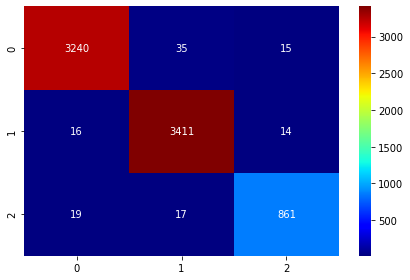

In [49]:
BERT_MODEL=modelEvaluation(val_preds_BERT, true_vals, 'BERT', classes)
collect_results_of_all_model["BERT"] = BERT_MODEL

In [55]:
df1 = df1[df1['Sentiment'] != '0.0']
df1 = df1[df1.Sentiment.notnull()]

In [54]:
final_pred = train_preds_BERT+val_preds_BERT
df1['BERT Labels'] = final_pred
df1.to_csv("BTC_Tweets_Updated.csv", index=False)

## Precition on Single Sample

In [83]:
Tweet = "RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: httâ€¦"

encoded_tweet = tokenizer.batch_encode_plus(
    Tweet,
    add_special_tokens=True,
    return_attention_mask=True,
    #pad_to_max_length=True,
    padding=True,
    truncation=True,
    max_length=256,
    return_tensors='pt'
)

input_ids_train = encoded_tweet['input_ids']
attention_masks_train = encoded_tweet['attention_mask']

dataset_sample = TensorDataset(
    input_ids_train,
    attention_masks_train,
)

dataloader_sample = DataLoader(
    dataset_sample,
    sampler=SequentialSampler(dataloader_sample),
)


In [84]:
model.eval()
loss_val_total = 0
predictions, true_vals = [], []
for batch in tqdm(dataloader_sample):
    batch = tuple(b.to(device) for b in batch)
    inputs = {'input_ids':      batch[0],
              'attention_mask': batch[1]
             }

    with torch.no_grad():        
        outputs = model(**inputs)
    
    out = outputs[0]
    out = out.cpu().data.numpy().argmax()
    label = list(label_dict.keys())[out]
    print(label)
#     loss = outputs[0]
#     logits = outputs[1]

#     logits = logits.detach().cpu().numpy()

#     print(logits)

  0%|          | 0/1 [00:00<?, ?it/s]

neutral


# Preprocesing for ML Models

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
import string
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /home/icrl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/icrl/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/icrl/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [169]:
dftaxes = df
dftaxes['Text_Data'] = dftaxes['Tweet'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))  # lower case conversion
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('[^\w\s]', '')  # getting rid of special characters
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('\d+',
                                                        '')  # removing numeric values from between the words
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(
    lambda x: x.translate(string.digits))  # removing numerical numbers
stop = stopwords.words('english')
dftaxes['Text_Data'] = dftaxes['Text_Data'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))  # removing stop words
stemmer = WordNetLemmatizer()
dftaxes['Text_Data'] = [stemmer.lemmatize(word) for word in
                        dftaxes['Text_Data']]  # converting words to their dictionary form
dftaxes['Text_Data'] = dftaxes['Text_Data'].str.replace('shall', '')


/home/icrl/anaconda3/envs/abdul-tf2x/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/home/icrl/anaconda3/envs/abdul-tf2x/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [170]:
cv=CountVectorizer(ngram_range=(1,2))
X_cv=cv.fit_transform(df['Text_Data'])
X=X_cv
y=df['label']

In [171]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

# Machine Learning Models
## SVC Model

In [194]:
from sklearn.svm import SVC
SVC_classifier= SVC(max_iter=200)
SVC_classifier.fit(X_train,y_train)

/home/icrl/anaconda3/envs/abdul-tf2x/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(max_iter=200)

In [195]:
preds=SVC_classifier.predict(X_test)

## SVC Results

========== SVC ==========

Accuracy on validation set: 0.6380

Classification report : 
               precision    recall  f1-score   support

           0       0.62      0.70      0.66      6623
           1       0.77      0.60      0.68      6857
           2       0.39      0.54      0.45      1776

    accuracy                           0.64     15256
   macro avg       0.60      0.62      0.60     15256
weighted avg       0.66      0.64      0.64     15256


Confusion Matrix : 
 [[4645 1039  939]
 [2166 4121  570]
 [ 624  185  967]]


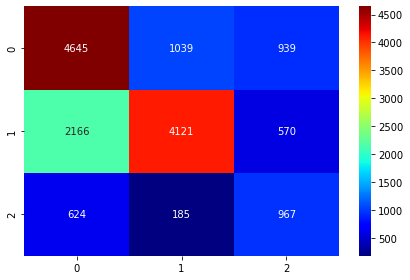

In [196]:
SVC_res=modelEvaluation(preds, y_test, 'SVC', classes)

In [197]:
collect_results_of_all_model["SVC"] = SVC_res

## Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF_model=RF.fit(X_train,y_train)

In [177]:
preds_RF=RF.predict(X_test)

## Random Forest Results

========== RF_CLassifier ==========

Accuracy on validation set: 0.9489

Classification report : 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      6623
           1       0.98      0.94      0.96      6857
           2       0.99      0.82      0.90      1776

    accuracy                           0.95     15256
   macro avg       0.96      0.92      0.94     15256
weighted avg       0.95      0.95      0.95     15256


Confusion Matrix : 
 [[6593   29    1]
 [ 416 6422   19]
 [ 238   76 1462]]


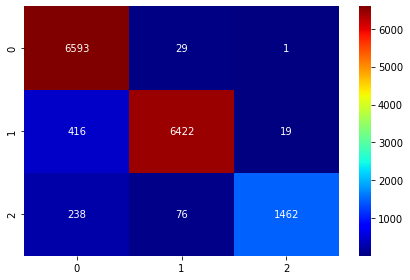

In [178]:
RF_res=modelEvaluation(preds_RF, y_test, 'RF_CLassifier', classes)
collect_results_of_all_model["RF_CLassifier"] = RF_res

## KNN Model

In [180]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_clf = KNeighborsClassifier(n_neighbors=5,)
neighbors_clf.fit(X_train,y_train)
KNN_preds=neighbors_clf.predict(X_test)

KNeighborsClassifier()

## KNN Results

========== KNN_test ==========

Accuracy on validation set: 0.8466

Classification report : 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      6623
           1       0.99      0.74      0.85      6857
           2       0.98      0.71      0.83      1776

    accuracy                           0.85     15256
   macro avg       0.91      0.82      0.84     15256
weighted avg       0.88      0.85      0.85     15256


Confusion Matrix : 
 [[6596   22    5]
 [1787 5051   19]
 [ 493   14 1269]]


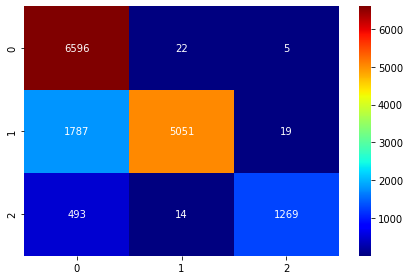

In [182]:
KNN_res=modelEvaluation(KNN_preds,y_test,'KNN_test',classes)
collect_results_of_all_model["KNN"] = KNN_res

# Results Comparison
## Comparison Table

In [198]:
from tabulate import tabulate 
metrics_data_frame = pd.DataFrame(collect_results_of_all_model)#create dataframe
metrics_data_frame = metrics_data_frame.set_index('Metrics')#set index
# displaying the DataFrame
print(tabulate(metrics_data_frame, headers = 'keys', tablefmt = 'psql'))#convert results in to table

+-----------+----------+----------+-----------------+----------+
| Metrics   |     BERT |      SVC |   RF_CLassifier |      KNN |
|-----------+----------+----------+-----------------+----------|
| accuracy  | 0.984793 | 0.637979 |        0.948938 | 0.846618 |
| precision | 0.980571 | 0.595433 |        0.960058 | 0.90583  |
| recall    | 0.97865  | 0.615606 |        0.91841  | 0.81569  |
| f1-score  | 0.979601 | 0.597047 |        0.93594  | 0.841304 |
+-----------+----------+----------+-----------------+----------+


## Comparison Bar Chart

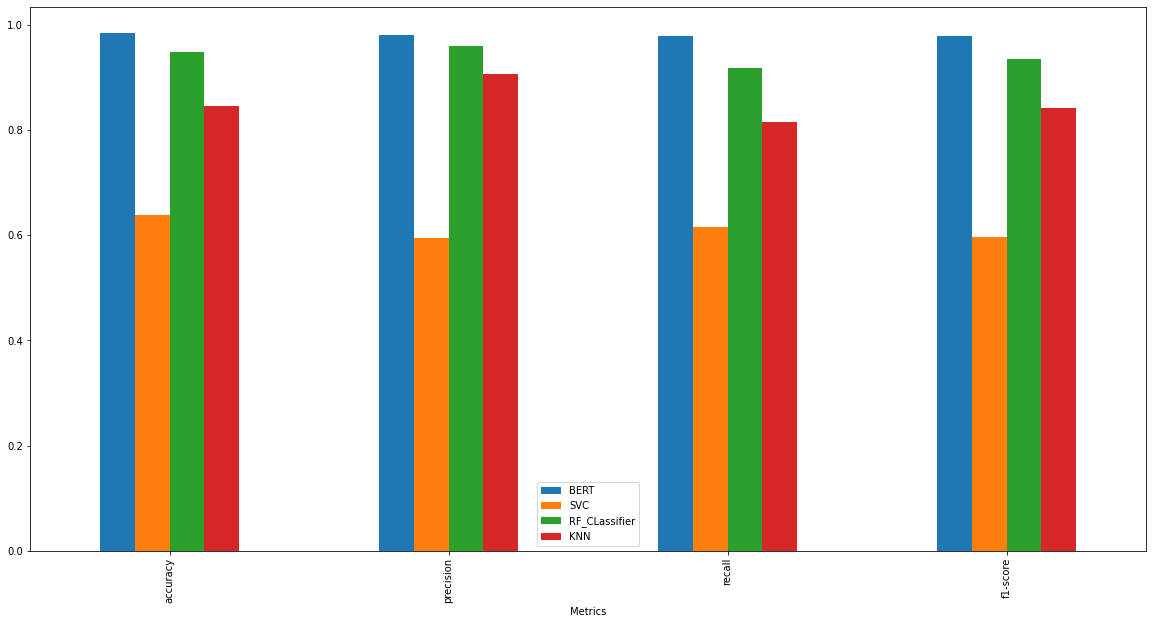

In [199]:
metrics_data_frame.plot(kind='bar', figsize=(20,10))#sho comparison base of mertics
plt.show()

## Accuracy Comparison Chart

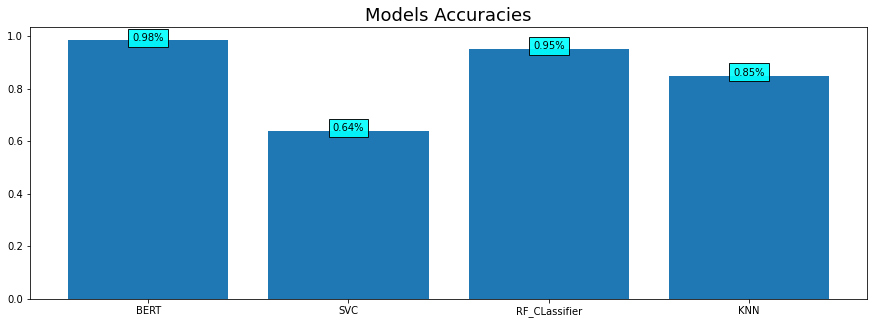

In [202]:
models_accuracy = metrics_data_frame.iloc[0].tolist()#accuracy
models_names = metrics_data_frame.columns.tolist()#name of model
plt.figure(figsize=(15,5))
plt.bar(models_names,models_accuracy)#bar plot
plt.title("Models Accuracies", fontsize=18)#title

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='cyan', alpha=0.9))

addLabels(models_names,models_accuracy)#adding labels
plt.show()